# Light version

In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import pandas as pd

from tsad.pipelines import Pipeline
from tsad.tasks.eda import HighLevelDatasetAnalysisTask, TimeDiscretizationTask
from tsad.tasks.eda import FindNaNTask, EquipmentDowntimeTask
from tsad.tasks.preprocess import ScalingTask, ValueRangeProcessingTask, ResampleProcessingTask 
from tsad.tasks.preprocess import FeatureProcessingTask, SplitByNaNTask, TrainTestSplitTask
from tsad.tasks.anomalyDetection import ResidualAnomalyDetectionTask


In [3]:
# df = pd.read_excel('/Users/kozit/Yandex.Disk.localized/СУЭК полупроекты/Хакатон Сколково для РГ МЫ на связи/Хакатон/Вх.данные.xls'
#                    ,skiprows=2)
df = pd.read_excel('C:/Users/kompn/YandexDisk/СУЭК полупроекты/Хакатон Сколково для РГ МЫ на связи/Хакатон/Вх.данные.xls'
                   ,skiprows=2)
data = df.pivot_table(values='Значение',index='Время',columns='Описание') 

In [4]:
project_path = 'C:/Users/kompn/YandexDisk/активности/Севресталь. ТОиР 18-28 мая'
X_train = pd.read_parquet(f'{project_path}/data/raw/X_train.parquet')
data = X_train[[x for x in X_train.columns if f'ЭКСГАУСТЕР {6}. ' in x]]

In [5]:
data = data[:10000]

In [6]:
# from tsad.datasets import load_combines
# dataset = load_combines()
# data = dataset.frame

In [7]:
%%time
inference_pipeline = Pipeline([
    HighLevelDatasetAnalysisTask(),
    TimeDiscretizationTask(),# freq_tobe='1s'),
    FindNaNTask(),
    EquipmentDowntimeTask(),
    ResampleProcessingTask(),
    FeatureProcessingTask(),
    SplitByNaNTask(),
    TrainTestSplitTask(len_seq=10),
], show=False)
df = inference_pipeline.fit(data)
# df

None
0 days 00:00:10
Пропущено 0 датастов, из-за того что saples слишком малов в датасете. (len_seq + points_ahead + gap -1 <= len(df))
CPU times: total: 1.11 s
Wall time: 1.08 s


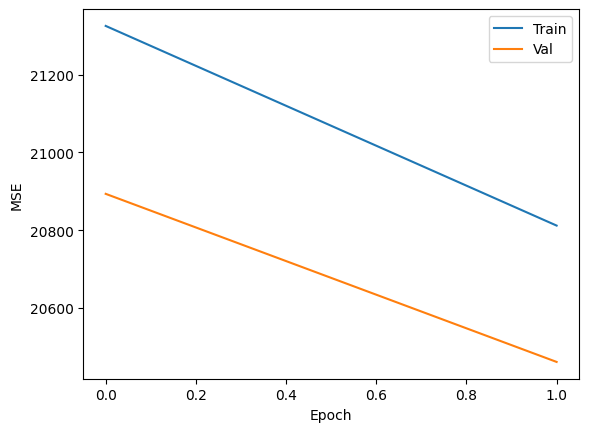

Epoch: 02 
	Train Loss: 20811.731 
	 Val. Loss: 20461.026 

Epoch: 01 
	Train Loss: 21325.318 
	 Val. Loss: 20893.370 


After choosing the best model:
Test Loss: 20464.164
asdasdas 4
(7492, 1, 16) (7492, 1, 16)


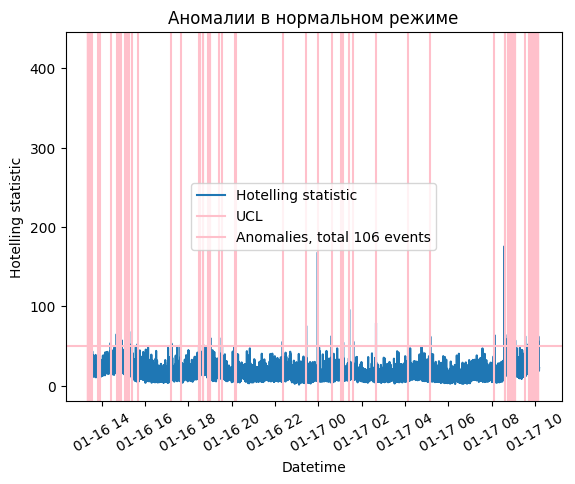

In [10]:
ss = ResidualAnomalyDetectionTask()
_, my_result = ss.fit(df,inference_pipeline.results[0],n_epochs=2,points_ahead=1)

In [13]:
_

,0
0,2019-01-16 13:22:40
1,2019-01-16 13:22:50
2,2019-01-16 13:23:00
3,2019-01-16 13:23:10
4,2019-01-16 13:23:20
...,...
101,2019-01-17 10:05:10
102,2019-01-17 10:07:10
103,2019-01-17 10:07:20
104,2019-01-17 10:08:40


(7492, 1, 16) (7492, 1, 16)


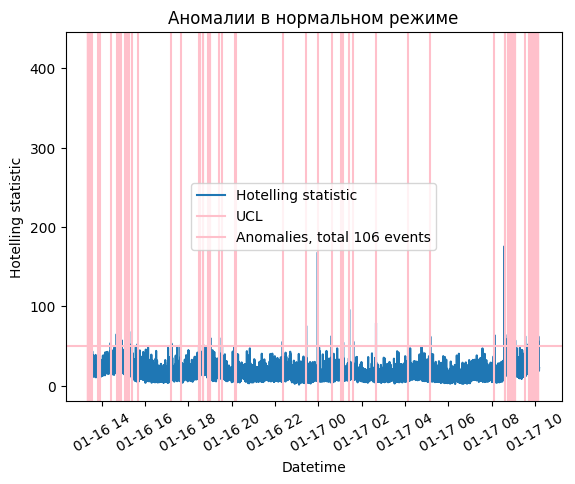

(                      0
 0   2019-01-16 13:22:40
 1   2019-01-16 13:22:50
 2   2019-01-16 13:23:00
 3   2019-01-16 13:23:10
 4   2019-01-16 13:23:20
 ..                  ...
 101 2019-01-17 10:05:10
 102 2019-01-17 10:07:10
 103 2019-01-17 10:07:20
 104 2019-01-17 10:08:40
 105 2019-01-17 10:09:10
 
 [106 rows x 1 columns],
 <tsad.tasks.anomalyDetection.ResidualAnomalyDetectionResult at 0x13a2b2f9420>)

In [11]:
ss.predict(df,my_result)

In [ ]:
for x in df:
    print(x[0].shape)

(10, 16)
(10, 16)
(1, 16)
(1, 16)


In [ ]:
raise

In [ ]:
def ss(**kwargs):
    print(kwargs)
    print(a+2)

In [ ]:
ss(a=2)

{'a': 2}


NameError: name 'a' is not defined

In [ ]:
rr.fit(df)

AttributeError: 'ResidualAnomalyDetectionTask' object has no attribute 'columns'

In [ ]:
raise

In [ ]:
dir(rr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'save',
 'show']

In [ ]:
rr.Loader()

In [ ]:
rr.fit(dfs)

AttributeError: 'ResidualAnomalyDetectionResult' object has no attribute 'fit'

In [ ]:
def my(**kwargs):

    def my2(a,b):
        print(a+b,c)
    my2(**kwargs)
my(a=2,b=3,c=6)

TypeError: my.<locals>.my2() got an unexpected keyword argument 'c'

In [ ]:
df[0]

Описание,Anker,Cut,Go,Uncert
Время,,,,
2023-04-21 13:32:48.220,0.0,NaN,NaN,NaN
2023-04-21 13:32:48.230,NaN,NaN,0.0,NaN


In [ ]:
# inference_pipeline.predict(data)

In [ ]:
# inference_pipeline.results.

In [ ]:
from tsad.utils.splitting import ts_train_test_split_dfs

## Новый алгоритм

In [ ]:
sets = ts_train_test_split_dfs(dfs=df,len_seq=10,points_ahead=1, gap=0, shag=1, intersection=True,
                     test_size=None,train_size=None, random_state=None,what_to_shuffle='train')

Пропущено 445 датастов, из-за того что saples слишком малов в датасете. (len_seq + points_ahead + gap -1 <= len(df))


In [ ]:
raise

# Как разрывать пайплайн

In [ ]:
import sys
import logging

sys.path.insert(1, '../')

from importlib import reload

reload(logging)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format='%(message)s')

In [ ]:
from tsad.pipelines import Pipeline
from tsad.tasks.eda import HighLevelDatasetAnalysisTask, TimeDiscretizationTask, FindNaNTask, EquipmentDowntimeTask
from tsad.tasks.preprocess import ScalingTask, ValueRangeProcessingTask

from tsad.datasets import load_combines

In [ ]:
dataset = load_combines()

#### Working with Task without Pipeline

In [ ]:
cdt = HighLevelDatasetAnalysisTask()
cdt_df, cdt_result = cdt.fit(dataset.frame)
cdt_result.show()

In [ ]:
discretization = TimeDiscretizationTask()
discretization.com = cdt_result

_, discretization_result = discretization.fit(cdt_df)

discretization_result.dataset_analysis_result = cdt_result
discretization_result.show()

#### Working with separate pipelines for group of tasks

In [ ]:
eda_tasks = [
    HighLevelDatasetAnalysisTask(),
    TimeDiscretizationTask(freq_tobe='1s'),
    FindNaNTask(),
    EquipmentDowntimeTask()
]

eda_pipeline = Pipeline(eda_tasks, show=False)
eda_fit_df = eda_pipeline.fit(dataset.frame)

In [ ]:
preprocess_tasks = [
    ScalingTask(),
    ValueRangeProcessingTask()
]

preprocess_pipeline = Pipeline(preprocess_tasks, results=eda_pipeline.results, show=True)
preprocess_fit_df = preprocess_pipeline.fit(eda_fit_df)
preprocess_pipeline.predict(eda_fit_df)

#### Work with Pipeline

In [ ]:
pipeline = Pipeline(eda_tasks + preprocess_tasks)
pipeline.fit(dataset.frame)

# Kozitisn

In [ ]:
from tsad.tasks.base import Task, TaskResult

In [ ]:
import numpy as np

In [ ]:
my = ValueRangeProcessingTask()

In [ ]:
my.fit(data)

In [ ]:
my.predict(data)

In [ ]:
dataset

In [ ]:
import sys
import logging

sys.path.insert(1, '../')

from importlib import reload

reload(logging)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format='%(message)s')

from tsad.pipelines import Pipeline
from tsad.tasks.eda import HighLevelDatasetAnalysisTask, TimeDiscretizationTask, FindNaNTask, EquipmentDowntimeTask
from tsad.tasks.preprocess import ScalingTask, ValueRangeProcessingTask

from tsad.datasets import load_combines

dataset = load_combines()

#### Working with Task without Pipeline

cdt = HighLevelDatasetAnalysisTask()
cdt_df, cdt_result = cdt.fit(dataset.frame)
cdt_result.show()

discretization = TimeDiscretizationTask()
discretization.com = cdt_result

_, discretization_result = discretization.fit(cdt_df)

discretization_result.dataset_analysis_result = cdt_result
discretization_result.show()

#### Working with separate pipelines for group of tasks

eda_tasks = [
    HighLevelDatasetAnalysisTask(),
    TimeDiscretizationTask(freq_tobe='1s'),
    FindNaNTask(),
    EquipmentDowntimeTask()
]

eda_pipeline = Pipeline(eda_tasks, show=False)
eda_fit_df = eda_pipeline.fit(dataset.frame)

preprocess_tasks = [
    ScalingTask(),
    ValueRangeProcessingTask()
]

preprocess_pipeline = Pipeline(preprocess_tasks, results=eda_pipeline.results, show=True)
preprocess_fit_df = preprocess_pipeline.fit(eda_fit_df)
preprocess_pipeline.predict(eda_fit_df)

#### Work with Pipeline

pipeline = Pipeline(eda_tasks + preprocess_tasks)
pipeline.fit(dataset.frame)

# Новый метод

In [ ]:
import sys
sys.path.insert(1, '../')

from tsad.pipelines import Pipeline
from tsad.tasks.eda import HighLevelDatasetAnalysisTask, TimeDiscretizationTask, FindNaNTask, EquipmentDowntimeTask
from tsad.tasks.preprocess import ScalingTask, ValueRangeProcessingTask
from tsad.datasets import load_combines

In [ ]:


dataset = load_combines()
data = dataset.frame


tasks = [
    HighLevelDatasetAnalysisTask(),
    TimeDiscretizationTask(freq_tobe='1s'),
    FindNaNTask(),
    EquipmentDowntimeTask(),
    ScalingTask(),
    ValueRangeProcessingTask(),
]


#### Work with Pipeline

pipeline = Pipeline(tasks)
pipeline.fit(df=data)

In [ ]:
class ValueRangeProcessingTask(Task):

    def __init__(self, 
                 name: str | None = None, 
                 method: str | None = 'auto',
                 show:  bool | None = True):
        super().__init__(name)
        
        self.show = show
        self.method = method
        
        
    def _check_intervals(self, df: pd.DataFrame, result: ValueRangeProcessingResult):
        import numpy as np
        
        mask_fault_mode = (df<result.min_values) | (df>result.max_values)
        if mask_fault_mode.sum().sum()!=0:
            import warnings
            if result.show:
                warnings.warn("Некоторые значения вышли за допустимый диапазон:")
                which_columns = mask_fault_mode.sum()!=0
                which_columns = which_columns[which_columns].index
                for col in which_columns:
                    display(df[col][mask_fault_mode[col]])
            else:
                warnings.warn("Некоторые значения вышли за допустимый диапазон. Сделай show=True, чтобы посмотреть подробнее""")
        if result.show:
            print('Значения вышедшие за интервал будут удалены')
        
        df[mask_fault_mode] = np.nan
        return df
        
        
    def fit(self, df: pd.DataFrame) -> tuple[pd.DataFrame, TaskResult]:

        result = ValueRangeProcessingResult()
        method = self.method
        
        if method=='auto':
            method = 'MinMax'
            
        if method == 'MinMax':
            result.min_values = df.min()
            result.max_values = df.max()    
        # if method =='Межкартильных размах'
            # mask = ((new_df < new_df.quantile(0.4)) | (new_df > new_df.quantile(0.8)))
            # df = data
            # min_values = df.median() + (df.max() - df.median())*2
            # max_values = df.median() - (df.median() - df.min())*2        
        df = self._check_intervals(df, result)        
        return df, result


    def predict(self, df: pd.DataFrame, vrp_result: ValueRangeProcessingResult) -> tuple[pd.DataFrame, TaskResult]:
        df = self._check_intervals(df, vrp_result) 
        return df, vrp_result